In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import joblib

In [2]:
# 1. Chargement des données 
data = pd.read_csv("D:\\M2 SISE\\Python Machine Learning\\Projet\\Performance_EnergetiqueA\\Performance_Energetique\\Data\\data69rhone.csv")  # Remplacez par le chemin de votre fichier si nécessaire

C:\Users\karam\AppData\Local\Temp\ipykernel_6552\3842020170.py:2: DtypeWarning: Columns (3,27,39,106) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:\\M2 SISE\\Python Machine Learning\\Projet\\Performance_EnergetiqueA\\Performance_Energetique\\Data\\data69rhone.csv")  # Remplacez par le chemin de votre fichier si nécessaire


In [3]:
data['Besoin_ECS'] = pd.to_numeric(data['Besoin_ECS'].replace(',', '.', regex=True), errors='coerce')

In [4]:
# Imputation pour les colonnes avec peu de valeurs manquantes
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
    
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\karam\AppData\Local\Temp\ipykernel_6552\1086663217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\karam\AppData\Local\Temp\ipykernel_6552\1086663217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
# Supposons que la colonne cible est "Etiquette_DPE" et qu'il y a des colonnes catégorielles et numériques
target = 'Etiquette_DPE'
data = data.dropna(subset=[target])

In [6]:
ls_variables_explicatives = [
'Conso_5_usages_par_m²_é_primaire',
'Emission_GES_5_usages_par_m²',
'Conso_5_usages/m²_é_finale',
'Conso_chauffage_é_primaire',
'Emission_GES_chauffage',
'Coût_chauffage',
'Besoin_ECS',
'Surface_habitable_logement',
'Coût_total_5_usages',
'Conso_5_usages_é_finale_énergie_n°1',
'Conso_ECS_é_primaire',
'Conso_éclairage_é_finale',
'Type_énergie_principale_chauffage',
'Conso_chauffage_é_finale',
'Année_construction'
]

In [7]:
# Définir les données d'entrée et la variable cible
X = data[ls_variables_explicatives]
y = data[target]
# Séparer les colonnes numériques et catégorielles
numeric_features = data[ls_variables_explicatives].select_dtypes(include=[np.number]).columns
categorical_features = data[ls_variables_explicatives].select_dtypes(exclude=[np.number]).columns


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Création des transformations pour chaque type de données
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),      # Impute les valeurs manquantes par la mediane
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute les valeurs manquantes par la valeur la plus fréquente
    ('ordinal', OrdinalEncoder())
])


# Application des transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Création du pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=0, verbose=1))
])

In [10]:
#Entraînement du modèle
pipeline.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   35.3s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Conso_5_usages_par_m²_é_primaire', 'Emission_GES_5_usages_par_m²',
       'Conso_5_usages/m²_é_finale', 'Conso_chauffage_é_primaire',
       'Emission_GES_chauffage', 'Coût_chauffage', 'Besoin_ECS',
       'Surface_habitable_logement', '...
       'Conso_5_usages_é_finale_énergie_n°1', 'Conso_ECS_é_primaire',
       'Conso_éclairage_é_finale', 'Conso_chauffage_é_finale',
       'Année_construction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Type_énergie_principale_chauffage'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(min_samples_split=5, random_state=0,
                                        verbose=1))])

In [11]:
y_pred = pipeline.predict(X_test)
y_pred

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


array(['D', 'C', 'D', ..., 'D', 'B', 'D'], dtype=object)

In [12]:
#Évaluation du modèle
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Matrice de confusion :
 [[ 1053     3     0     1     0     0     0]
 [    1  2181    21     0     0     0     0]
 [    0     1 21512   151     3     0     0]
 [    0     1   148 16881   122     1     0]
 [    0     0     9   112  9784    52     0]
 [    0     0     3    10    62  3210    28]
 [    0     0     2     3    10    23  2045]]
Rapport de classification :
               precision    recall  f1-score   support

           A       1.00      1.00      1.00      1057
           B       1.00      0.99      0.99      2203
           C       0.99      0.99      0.99     21667
           D       0.98      0.98      0.98     17153
           E       0.98      0.98      0.98      9957
           F       0.98      0.97      0.97      3313
           G       0.99      0.98      0.98      2083

    accuracy                           0.99     57433
   macro avg       0.99      0.99      0.99     57433
weighted avg       0.99      0.99      0.99     57433



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s


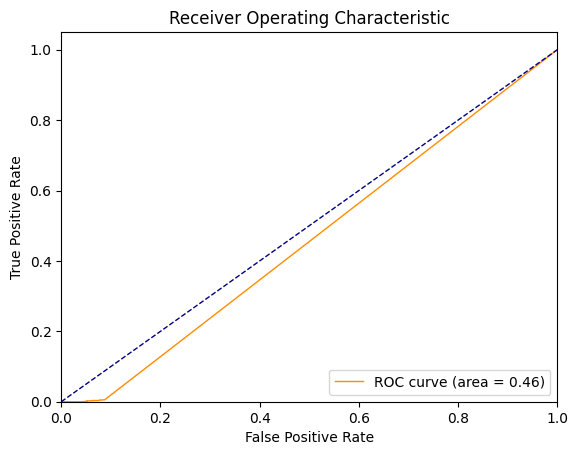

In [ ]:
#la courbe roc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = pipeline.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label='G')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
# Chargement et utilisation du pipeline sauvegardé
pipeline_loaded = joblib.load('D:\\M2 SISE\\Python Machine Learning\\Projet\\Performance_EnergetiqueA\\Performance_Energetique\\Modèle\\pipeline.pkl')

In [14]:

y_pred_loaded = pipeline_loaded.predict(X_test)
print("Évaluation du pipeline chargé :")
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_loaded))
print("Rapport de classification :\n", classification_report(y_test, y_pred_loaded))

Évaluation du pipeline chargé :
Matrice de confusion :
 [[ 1049     7     0     1     0     0     0]
 [    1  2183    19     0     0     0     0]
 [    0     1 21534   130     2     0     0]
 [    0     2   149 16881   120     0     1]
 [    0     0     9   110  9784    54     0]
 [    0     0     2    11    55  3217    28]
 [    0     0     1     5    12    22  2043]]
Rapport de classification :
               precision    recall  f1-score   support

           A       1.00      0.99      1.00      1057
           B       1.00      0.99      0.99      2203
           C       0.99      0.99      0.99     21667
           D       0.99      0.98      0.98     17153
           E       0.98      0.98      0.98      9957
           F       0.98      0.97      0.97      3313
           G       0.99      0.98      0.98      2083

    accuracy                           0.99     57433
   macro avg       0.99      0.99      0.99     57433
weighted avg       0.99      0.99      0.99     57433

